In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model, model_from_json
from keras import regularizers, Sequential

In [2]:
train_df = pd.read_csv("../../Datasets/train.csv")
test_df = pd.read_csv("../../Datasets/test.csv")

In [3]:
train_df.drop("Unnamed: 0", axis=1,inplace=True)
test_df.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
train_index = train_df["Date and time"]
test_index = test_df["Date and time"]

In [5]:
train_df

,Date and time,Gear oil temperature (°C),Front bearing temperature (°C),Rear bearing temperature (°C),Gear oil inlet temperature (°C),Generator bearing front temperature (°C),Generator bearing rear temperature (°C),Rotor bearing temp (°C),Stator temperature 1 (°C)
0,01-01-2020 00:00,56.972500,65.880001,65.382499,55.497500,38.277500,36.752500,27.182501,58.377500
1,01-01-2020 00:10,56.695001,64.602500,64.712498,55.230000,39.145000,37.037499,27.190001,58.952500
2,01-01-2020 00:20,56.640000,64.740000,64.917499,55.107500,39.897500,37.347500,27.197501,59.660000
3,01-01-2020 00:30,56.432500,63.137500,63.990000,55.135000,40.625000,37.752500,27.140001,60.550000
4,01-01-2020 00:40,56.169998,62.037500,63.525000,54.915000,41.252500,38.362500,27.100000,61.694999
...,...,...,...,...,...,...,...,...,...
311912,31-12-2020 23:10,50.830000,57.390000,59.570001,50.375000,36.480000,36.380000,23.212501,57.970000
311913,31-12-2020 23:20,50.792500,56.595000,58.920000,50.307499,37.410000,36.672500,23.297499,58.472500
311914,31-12-2020 23:30,50.742500,57.007500,59.552501,50.109999,38.177500,37.022499,23.299999,59.207500
311915,31-12-2020 23:40,50.799999,58.134999,60.345002,50.037499,38.872500,37.244998,23.319999,59.747500


In [6]:
test_df

,Date and time,Gear oil temperature (°C),Front bearing temperature (°C),Rear bearing temperature (°C),Gear oil inlet temperature (°C),Generator bearing front temperature (°C),Generator bearing rear temperature (°C),Rotor bearing temp (°C),Stator temperature 1 (°C)
0,01-01-2021 00:00,17.442500,17.300000,15.615000,12.577500,16.700001,10.675000,10.700000,17.779999
1,01-01-2021 00:10,18.220000,17.172501,15.445000,13.687500,16.535000,10.600000,10.687500,17.600000
2,01-01-2021 00:20,18.230000,17.102500,15.490000,14.760000,16.427500,10.430000,10.600000,17.532500
3,01-01-2021 00:30,17.485000,17.035000,15.340000,12.520000,16.320000,10.327500,10.510000,17.495000
4,01-01-2021 00:40,17.785000,16.885000,15.220000,13.002500,16.200001,10.285000,10.380000,17.400000
...,...,...,...,...,...,...,...,...,...
142887,16-06-2021 07:40,57.497499,65.087501,66.695001,56.230000,47.552500,47.002500,31.000000,64.980001
142888,16-06-2021 07:50,57.591667,64.636111,66.141666,56.108333,44.544444,45.872222,31.000000,63.244444
142889,16-06-2021 08:00,57.375001,63.017500,65.092500,55.575000,41.740000,44.455000,31.062500,60.907500
142890,16-06-2021 08:10,57.239474,61.592105,63.465789,56.357895,40.365789,43.505264,31.157895,59.463159


In [7]:
train_df.drop('Date and time', axis=1, inplace=True)
test_df.drop('Date and time', axis=1, inplace=True)

In [8]:
train_df

,Gear oil temperature (°C),Front bearing temperature (°C),Rear bearing temperature (°C),Gear oil inlet temperature (°C),Generator bearing front temperature (°C),Generator bearing rear temperature (°C),Rotor bearing temp (°C),Stator temperature 1 (°C)
0,56.972500,65.880001,65.382499,55.497500,38.277500,36.752500,27.182501,58.377500
1,56.695001,64.602500,64.712498,55.230000,39.145000,37.037499,27.190001,58.952500
2,56.640000,64.740000,64.917499,55.107500,39.897500,37.347500,27.197501,59.660000
3,56.432500,63.137500,63.990000,55.135000,40.625000,37.752500,27.140001,60.550000
4,56.169998,62.037500,63.525000,54.915000,41.252500,38.362500,27.100000,61.694999
...,...,...,...,...,...,...,...,...
311912,50.830000,57.390000,59.570001,50.375000,36.480000,36.380000,23.212501,57.970000
311913,50.792500,56.595000,58.920000,50.307499,37.410000,36.672500,23.297499,58.472500
311914,50.742500,57.007500,59.552501,50.109999,38.177500,37.022499,23.299999,59.207500
311915,50.799999,58.134999,60.345002,50.037499,38.872500,37.244998,23.319999,59.747500


In [9]:
test_df

,Gear oil temperature (°C),Front bearing temperature (°C),Rear bearing temperature (°C),Gear oil inlet temperature (°C),Generator bearing front temperature (°C),Generator bearing rear temperature (°C),Rotor bearing temp (°C),Stator temperature 1 (°C)
0,17.442500,17.300000,15.615000,12.577500,16.700001,10.675000,10.700000,17.779999
1,18.220000,17.172501,15.445000,13.687500,16.535000,10.600000,10.687500,17.600000
2,18.230000,17.102500,15.490000,14.760000,16.427500,10.430000,10.600000,17.532500
3,17.485000,17.035000,15.340000,12.520000,16.320000,10.327500,10.510000,17.495000
4,17.785000,16.885000,15.220000,13.002500,16.200001,10.285000,10.380000,17.400000
...,...,...,...,...,...,...,...,...
142887,57.497499,65.087501,66.695001,56.230000,47.552500,47.002500,31.000000,64.980001
142888,57.591667,64.636111,66.141666,56.108333,44.544444,45.872222,31.000000,63.244444
142889,57.375001,63.017500,65.092500,55.575000,41.740000,44.455000,31.062500,60.907500
142890,57.239474,61.592105,63.465789,56.357895,40.365789,43.505264,31.157895,59.463159


### AutoEncoder for Anomoly Detection

In [10]:
# Defining the autoencoder model
input_layer = Input(shape=(train_df.shape[1],8))
encoded = Dense(256, activation='relu')(input_layer)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(train_df.shape[1], activation='relu')(decoded)

autoencoder = Model(input_layer, decoded)

# Compiling the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8, 8)]            0         
                                                                 
 dense (Dense)               (None, 8, 256)            2304      
                                                                 
 dense_1 (Dense)             (None, 8, 128)            32896     
                                                                 
 dense_2 (Dense)             (None, 8, 64)             8256      
                                                                 
 dense_3 (Dense)             (None, 8, 32)             2080      
                                                                 
 dense_4 (Dense)             (None, 8, 16)             528       
                                                                 
 dense_5 (Dense)             (None, 8, 32)             544   

In [11]:
# #fitting the model
# history = autoencoder.fit(train_df, train_df, epochs=100, batch_size=64,validation_split=0.2, shuffle=True).history

In [12]:
# model_json = autoencoder.to_json()
# with open("../Model Files/Autoencoder Model/Anomoly_det_model.json", "w") as json_file:
#     json_file.write(model_json)

# autoencoder.save_weights("../Model Files/Autoencoder ModelAnomoly_det_model.h5")

In [13]:
# fig, ax = plt.subplots(figsize=(14, 6), dpi=80,)
# ax.plot(history['loss'], 'b', label='Train', linewidth=2)
# ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
# ax.set_title('Model loss', fontsize=16)
# ax.set_ylabel('Loss (mae)')
# ax.set_xlabel('Epoch')
# ax.legend(loc='upper right')
# plt.show()

### Calling the Autoencoder Model to find Thershold and Anomaly values

In [14]:
file = open('../Model Files/Autoencoder Model/Anomoly_det_model.json', 'r')
loaded  = file.read()
file.close()

autoencoder = model_from_json(loaded)
autoencoder.load_weights("../Model Files/Autoencoder Model/Anomoly_det_model.h5")

In [15]:
train_pred=autoencoder.predict(train_df)
train_pred=train_pred.reshape(train_pred.shape[0],train_pred.shape[1])

train=train_df.values.reshape(train_df.shape[0],train_df.shape[1])

9748/9748 [==============================] - 9s 904us/step


In [16]:
loss=np.mean(np.abs(train_pred-train),axis=1)

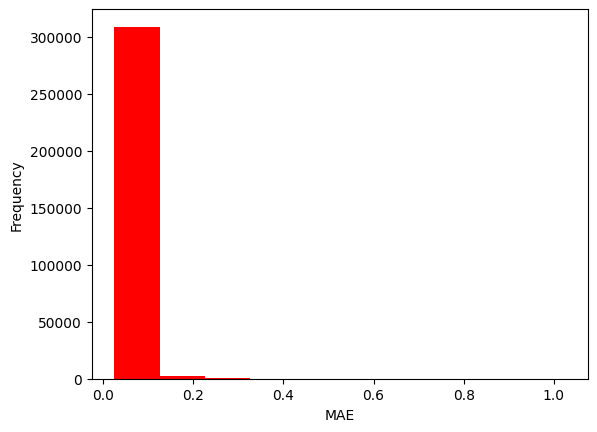

In [17]:
plt.hist(loss,color='red')
plt.xlabel('MAE')
plt.ylabel('Frequency')
plt.show()

c:\Users\tanus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x500 with 0 Axes>

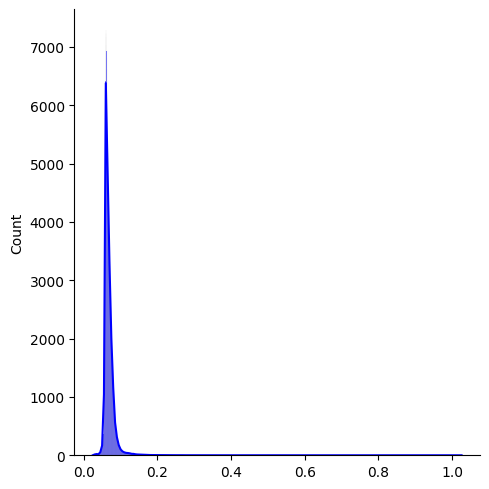

In [18]:
plt.figure(figsize=(5,5))
sns.displot(loss,kde=True,color='blue')

In [19]:
test_pred=autoencoder.predict(test_df)
test_pred=test_pred.reshape(test_pred.shape[0],test_pred.shape[1])

4466/4466 [==============================] - 4s 800us/step


In [26]:
test_pred

array([[17.438877, 17.383589, 15.668121, ..., 10.755261, 10.70062 ,
        17.758497],
       [18.212355, 17.228868, 15.52341 , ..., 10.661375, 10.708209,
        17.585917],
       [18.229523, 17.188467, 15.577763, ..., 10.552832, 10.614993,
        17.550272],
       ...,
       [57.425907, 63.097336, 65.08534 , ..., 44.45974 , 31.047415,
        60.97353 ],
       [57.292217, 61.664818, 63.46321 , ..., 43.5143  , 31.146173,
        59.529064],
       [56.56615 , 59.2124  , 60.305607, ..., 43.471745, 31.118753,
        58.808784]], dtype=float32)

In [20]:
test=test_df.values.reshape(test_df.shape[0],test_df.shape[1])

c:\Users\tanus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\tanus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x500 with 0 Axes>

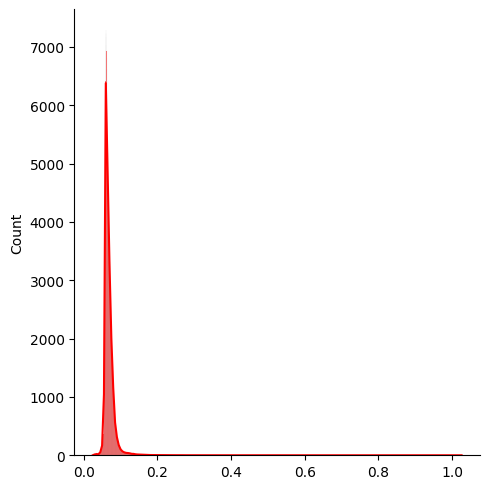

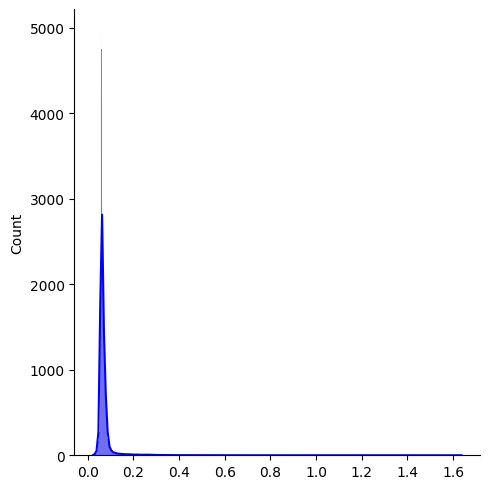

In [21]:
test_loss=np.mean(np.abs(test_pred-test),axis=1)
plt.figure(figsize=(5,5))
sns.displot(loss,kde=True,color='red',label='Training Loss')
sns.displot(test_loss,kde=True,color='blue',label='Testing Loss')

In [29]:
anomaly=pd.DataFrame()
anomaly.index = test_index
anomaly['Test MAE']=test_loss
#threshold
anomaly['Threshold']=np.mean(test_loss)+10*np.std(test_loss)
anomaly['Status']=anomaly['Test MAE']>anomaly['Threshold']

anomaly

,Test MAE,Threshold,Status
Date and time,,,
01-01-2021 00:00,0.053620,0.585118,False
01-01-2021 00:10,0.051120,0.585118,False
01-01-2021 00:20,0.060455,0.585118,False
01-01-2021 00:30,0.062962,0.585118,False
01-01-2021 00:40,0.055929,0.585118,False
...,...,...,...
16-06-2021 07:40,0.064136,0.585118,False
16-06-2021 07:50,0.061655,0.585118,False
16-06-2021 08:00,0.059255,0.585118,False


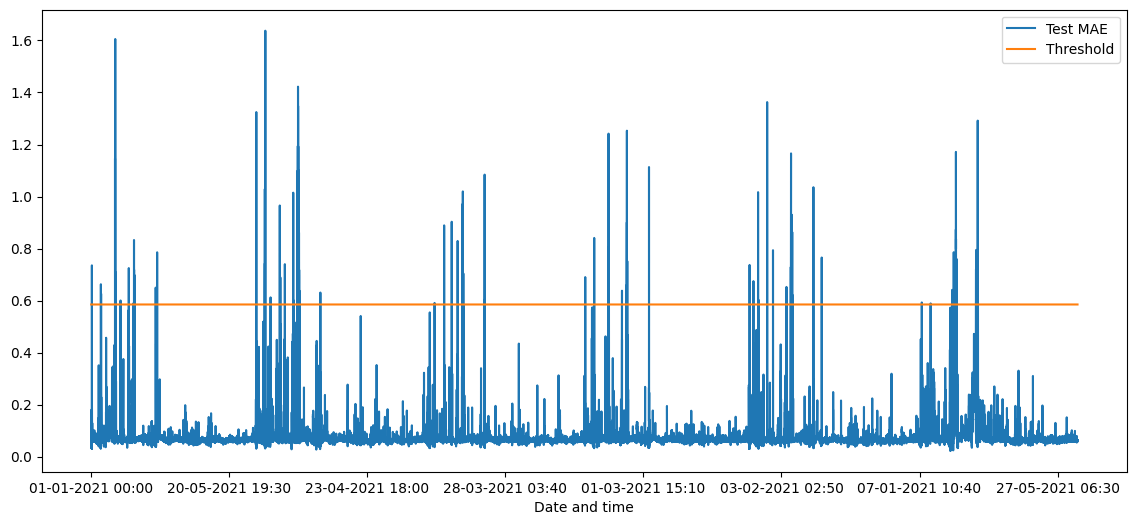

In [30]:
anomaly[['Test MAE', 'Threshold']].plot(figsize=(14, 6))
plt.show()